# BZNSYP - 数据分析报告

In [1]:
import os
import glob
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from tqdm import tqdm

## 挂载 Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 解压数据

数据来自：[标贝科技 - 中文标准女声音库](https://test.data-baker.com/#/data/index/source)

这个必须得手动下载，然后再上传到 Google Drive 上

In [4]:
!unrar x /content/drive/MyDrive/训练数据/语音/BZNSYP/BZNSYP.rar /content > unzip_log.txt

## 统计音频时长

In [5]:
audio_duration = dict()

for file in tqdm(glob.glob('/content/Wave/*.wav')):
  name = os.path.splitext(os.path.split(file)[1])[0]
  audio_duration[name] = librosa.get_duration(filename=file)

audio_duration = pd.DataFrame.from_dict(audio_duration, orient='index', columns=['duration'])
audio_duration = audio_duration.sort_values('duration', ascending=False)

100%|██████████| 10000/10000 [00:08<00:00, 1235.16it/s]


总时长（小时）

In [6]:
audio_duration.sum() / 3600

duration    11.855612
dtype: float64

总体特征

In [7]:
audio_duration.describe()

,duration
count,10000.000000
mean,4.268020
std,1.253692
min,1.415000
25%,3.205750
50%,4.229000
75%,5.235250
max,8.329000


时长分布

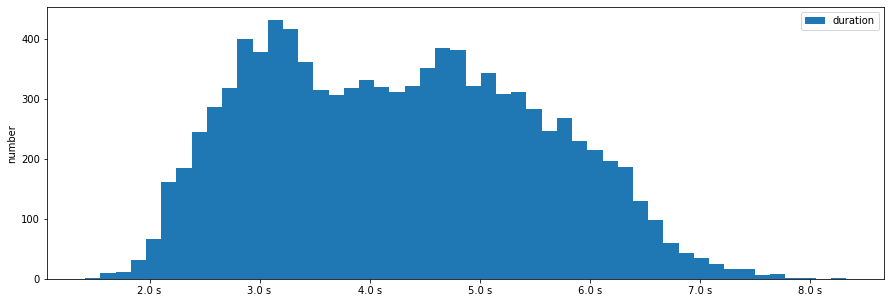

In [8]:
audio_duration.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))

最长的 5 条音频

In [9]:
audio_duration.head()

,duration
007537,8.329
001760,8.320
008224,7.936
000805,7.930
007892,7.833


最短的 5 条音频

In [10]:
audio_duration.tail().iloc[::-1]

,duration
007245,1.415
008724,1.575
009338,1.590
006752,1.618
001042,1.630


## 统计句子长度

读取音频对应的句子

In [12]:
sentences = dict()

with open('/content/ProsodyLabeling/000001-010000.txt', 'r', encoding='utf-8') as f:
  while True:
    l1 = f.readline()
    l2 = f.readline()
    if len(l1) == 0: break

    name, words = l1.split('\t')
    pinyins = l2.strip().split(' ')
    sentences[name] = pinyins

计算字数

In [13]:
sentences_length = dict()
for k, v in sentences.items():
  sentences_length[k] = len(v)

sentences_length = pd.DataFrame.from_dict(sentences_length, orient='index', columns=['length'])
sentences_length = sentences_length.sort_values('length', ascending=False)

总字数

In [14]:
sentences_length.sum()

length    162864
dtype: int64

总体特征

In [15]:
sentences_length.describe()

,length
count,10000.00000
mean,16.28640
std,5.39406
min,3.00000
25%,12.00000
50%,16.00000
75%,20.00000
max,34.00000


长度分布

Text(0, 0.5, 'number')

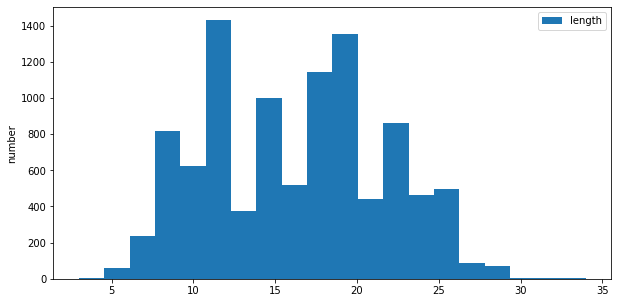

In [16]:
sentences_length.plot.hist(bins=20, figsize=(10, 5))
plt.ylabel('number')

最长的 5 条句子

In [17]:
sentences_length.head()

,length
009010,34
001760,34
009975,33
007537,32
009057,32


最短的 5 条句子

In [18]:
sentences_length.tail().iloc[::-1]

,length
007245,3
006752,4
008724,4
005547,5
004147,5


## 统计语速变化

In [19]:
speed_change = audio_duration['duration'] / sentences_length['length'] * 1000
speed_change = pd.DataFrame(speed_change, columns=['speed (ms)'])
speed_change = speed_change.sort_values('speed (ms)', ascending=False)

总体特征

In [20]:
speed_change.describe()

,speed (ms)
count,10000.000000
mean,267.173196
std,24.863373
min,203.181818
25%,249.629934
50%,263.000000
75%,280.666667
max,471.666667


语速分布

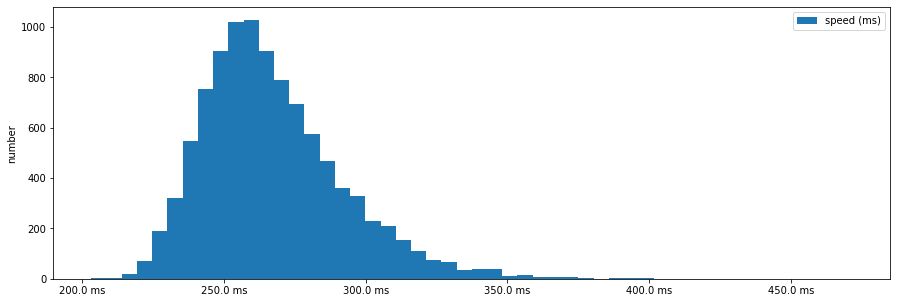

In [21]:
speed_change.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f ms'))

语速最快的 5 条音频

In [22]:
speed_change.tail().iloc[::-1]

,speed (ms)
009237,203.181818
009331,207.692308
006892,207.947368
006256,208.555556
008587,209.736842


语速最慢的 5 条音频

In [23]:
speed_change.head()

,speed (ms)
007245,471.666667
006752,404.500000
009875,398.600000
004133,398.400000
000177,394.285714


## 统计发音覆盖范围

注意这个数据集里面包含的有儿化音，例如：`景儿-jingr3`，所有的儿化音都是在标准音后面加上 `r`。

### 5 种声调的分布情况

In [24]:
pinyin_distribution = dict()

for pinyins in sentences.values():
  for i in pinyins:
    if i in pinyin_distribution:
      pinyin_distribution[i] +=1 
    else:
      pinyin_distribution[i] = 1

pinyin_distribution = pd.DataFrame.from_dict(pinyin_distribution, orient='index', columns=['number'])
pinyin_distribution = pinyin_distribution.sort_values('number', ascending=False)

总体特征

In [25]:
pinyin_distribution.describe()

,number
count,1607.000000
mean,101.346609
std,220.944415
min,1.000000
25%,14.000000
50%,30.000000
75%,105.000000
max,4948.000000


发音分布

Text(0, 0.5, 'number')

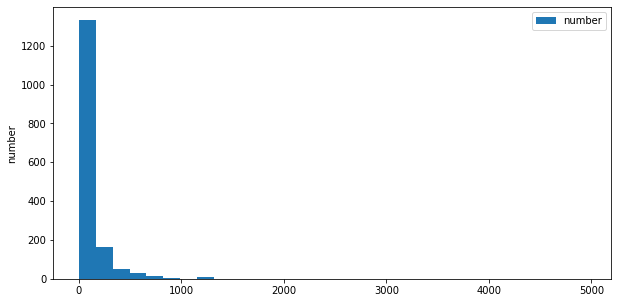

In [26]:
pinyin_distribution.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [27]:
pinyin_distribution.head()

,number
de5,4948
shi4,2899
yi4,1863
le5,1696
zai4,1483


### 去除声调后的分布情况

In [28]:
pinyin_distribution_without_intonation = dict()

for pinyins in sentences.values():
  for i in pinyins:
    i = i[:-1]
    if i in pinyin_distribution_without_intonation:
      pinyin_distribution_without_intonation[i] +=1 
    else:
      pinyin_distribution_without_intonation[i] = 1

pinyin_distribution_without_intonation = pd.DataFrame.from_dict(pinyin_distribution_without_intonation, orient='index', columns=['number'])
pinyin_distribution_without_intonation = pinyin_distribution_without_intonation.sort_values('number', ascending=False)

总体特征

In [29]:
pinyin_distribution_without_intonation.describe()

,number
count,462.000000
mean,352.519481
std,527.154061
min,1.000000
25%,57.000000
50%,187.500000
75%,443.000000
max,5197.000000


发音分布

Text(0, 0.5, 'number')

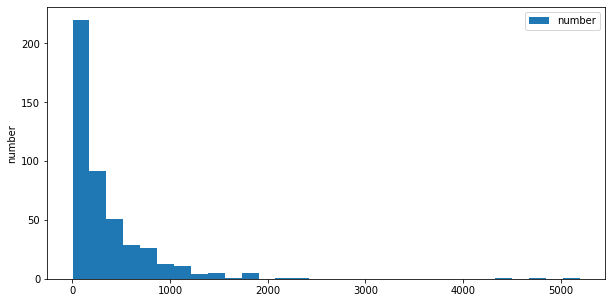

In [30]:
pinyin_distribution_without_intonation.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [31]:
pinyin_distribution_without_intonation.head()

,number
de,5197
shi,4758
yi,4409
you,2424
bu,2112
